<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Imagenes

Programa creado para mostrar ejemplos prácticos de los visto durante la clase<br>
v1.1

# Uso y manipulación de imagenes

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
from keras.utils import to_categorical

## 1 - Pixel y escala

In [2]:
# Un pixel es un cuadrado de dimensiones 1x1 (1 fila 1 columna)
pix = np.array([[125]])
pix.shape

(1, 1)

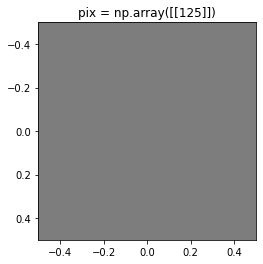

In [3]:
# Los píxeles tienen un valor de escala que representará más tarde un color
# Esa escala puede ir de 0 a 1 o de 0 a 255 generalmente donde
# 1 o 255 (el valor máximo) significa mayor luz
# 0 (el valor mínimo) significa menor cantidad de luz (oscuro)
# Es por eso generalmente el 0 se lo asocia con el negro y el 255 o 1
# con el color en su máxima luz (blanco)
# Dibujar el pixel con una valor 125 es el medio de la escala:
plt.imshow(pix, vmin=0, vmax=255, cmap="gray")
plt.title("pix = np.array([[125]])")
plt.show()

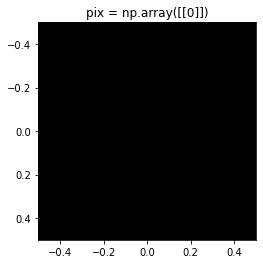

In [4]:
pix_low = np.array([[0]])
plt.imshow(pix_low, vmin=0, vmax=255, cmap="gray")
plt.title("pix = np.array([[0]])")
plt.show()

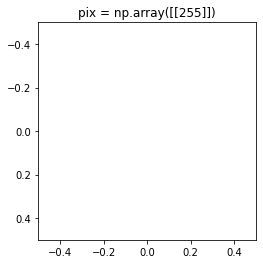

In [5]:
pix_max = np.array([[255]])
plt.imshow(pix_max, vmin=0, vmax=255, cmap="gray")
plt.title("pix = np.array([[255]])")
plt.show()

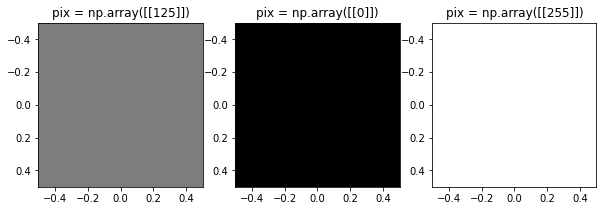

In [6]:
fig = plt.figure(figsize=(10,9))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.imshow(pix, vmin=0, vmax=255, cmap="gray")
ax1.set_title("pix = np.array([[125]])")
ax2.imshow(pix_low, vmin=0, vmax=255, cmap="gray")
ax2.set_title("pix = np.array([[0]])")
ax3.imshow(pix_max, vmin=0, vmax=255, cmap="gray")
ax3.set_title("pix = np.array([[255]])")
plt.show()

## 2 - Dimensiones de una imagen

In [7]:
if os.access('morrones.jpg', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/redes_profundas_python/main/morrones.jpg > morrones.jpg
    else:
        !wget morrones.jpg https://raw.githubusercontent.com/InoveAlumnos/redes_profundas_python/main/morrones.jpg

--2020-11-23 10:16:52--  http://morrones.jpg/
Resolving morrones.jpg (morrones.jpg)... failed: Name or service not known.
wget: unable to resolve host address ‘morrones.jpg’
--2020-11-23 10:16:52--  https://raw.githubusercontent.com/InoveAlumnos/redes_profundas_python/main/morrones.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.216.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.216.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32411 (32K) [image/jpeg]
Saving to: ‘morrones.jpg’

morrones.jpg        100%[===================>]  31,65K  --.-KB/s    in 0,001s  

2020-11-23 10:16:53 (57,2 MB/s) - ‘morrones.jpg’ saved [32411/32411]

FINISHED --2020-11-23 10:16:53--
Total wall clock time: 0,6s
Downloaded: 1 files, 32K in 0,001s (57,2 MB/s)


Dimensiones: alto: 700 , ancho: 1000
Dimensiones: height: 700 , width: 1000


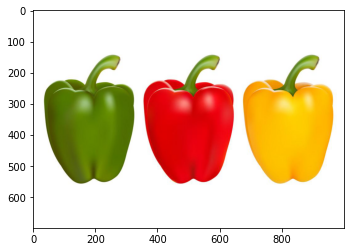

In [8]:
# Leer imagen
img = mpimg.imread('morrones.jpg') 
  
# Mostrar imagen 
plt.imshow(img)
print("Dimensiones: alto:", img.shape[0], ", ancho:", img.shape[1]) 
print("Dimensiones: height:", img.shape[0], ", width:", img.shape[1]) 

In [9]:
print("Dimensiones: alto:", img.shape[0], ", ancho:", img.shape[1], ", canales:", img.shape[2]) 
print("Dimensiones: height:", img.shape[0], ", width:", img.shape[1], ", channles:", img.shape[2])
print(img.shape)

Dimensiones: alto: 700 , ancho: 1000 , canales: 3
Dimensiones: height: 700 , width: 1000 , channles: 3
(700, 1000, 3)


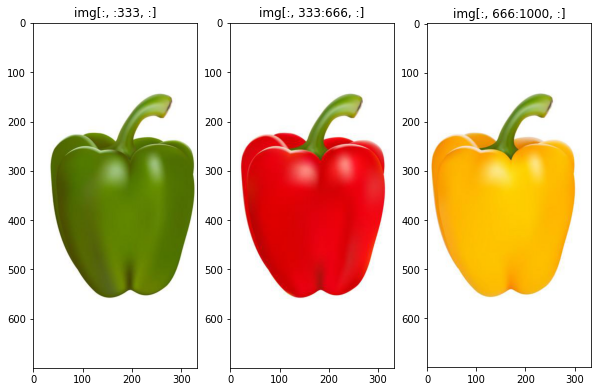

In [10]:
# Recortar la imagen en 3 partes
# img[alto, ancho, canal]
# no recordar el alto     --> img[:, X, X]
# recortar el ancho       --> img[:, rango, X]
# no recortar los canales --> img[:, rango, :]
morron_verde = img[:, :333, :]
morron_rojo = img[:, 333:666, :]
morron_amarillo = img[:, 666:1000, :]

fig = plt.figure(figsize=(10,9))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.imshow(morron_verde)
ax1.set_title("img[:, :333, :]")
ax2.imshow(morron_rojo)
ax2.set_title("img[:, 333:666, :]")
ax3.imshow(morron_amarillo)
ax3.set_title("img[:, 666:1000, :]")
plt.show()

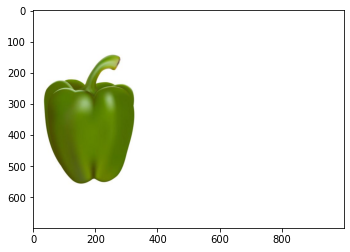

In [11]:
imagen_copia = np.ones(shape=img.shape, dtype=np.uint8) * 255
imagen_copia[:, :333, :] = img[:, :333, :]
plt.imshow(imagen_copia)

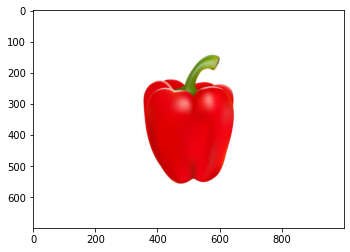

In [12]:
imagen_copia = np.ones(shape=img.shape, dtype=np.uint8) * 255
imagen_copia[:, 333:666, :] = img[:, 333:666, :]
plt.imshow(imagen_copia)

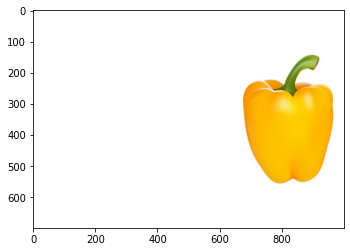

In [13]:
imagen_copia = np.ones(shape=img.shape, dtype=np.uint8) * 255
imagen_copia[:, 666:1000, :] = img[:, 666:1000, :]
plt.imshow(imagen_copia)

## 3 - Canales de color

In [14]:
# Los canales de color o profundidad de la imagen representan la tercera dimensión
# luego del alto y el ancho
print("Canales o profundiad de la imagen:", img.shape[2])

Canales o profundiad de la imagen: 3


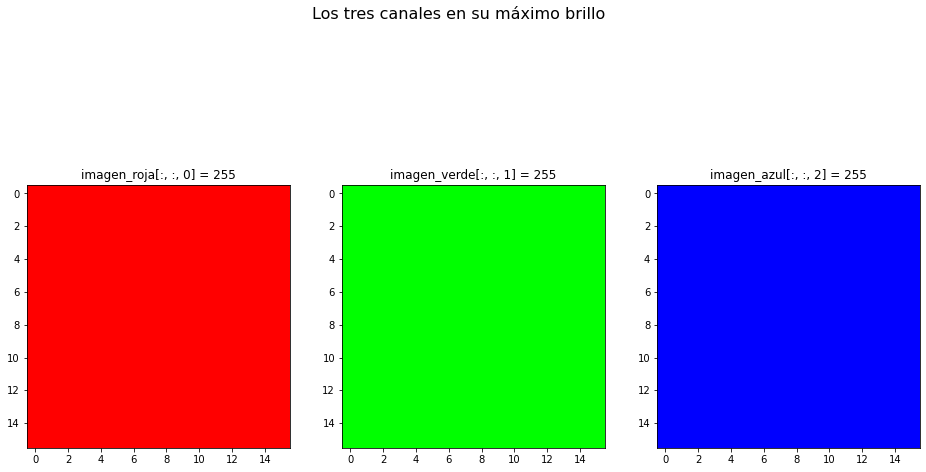

In [15]:
# El primer canal de esos tres es el rojo, luego el verde y luego azul
# A esta representación se la llama RGB (red, green, blue)
fig = plt.figure(figsize=(16,9))
fig.suptitle('Los tres canales en su máximo brillo', fontsize=16)
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

imagen_roja = np.ones(shape=(16, 16, 3), dtype=np.uint8) * 0
imagen_roja[:, :, 0] = 255
ax1.imshow(imagen_roja)
ax1.set_title("imagen_roja[:, :, 0] = 255")

imagen_verde = np.ones(shape=(16, 16, 3), dtype=np.uint8) * 0
imagen_verde[:, :, 1] = 255
ax2.imshow(imagen_verde)
ax2.set_title("imagen_verde[:, :, 1] = 255")

imagen_azul = np.ones(shape=(16, 16, 3), dtype=np.uint8) * 0
imagen_azul[:, :, 2] = 255
ax3.imshow(imagen_azul)
ax3.set_title("imagen_azul[:, :, 2] = 255")
plt.show()

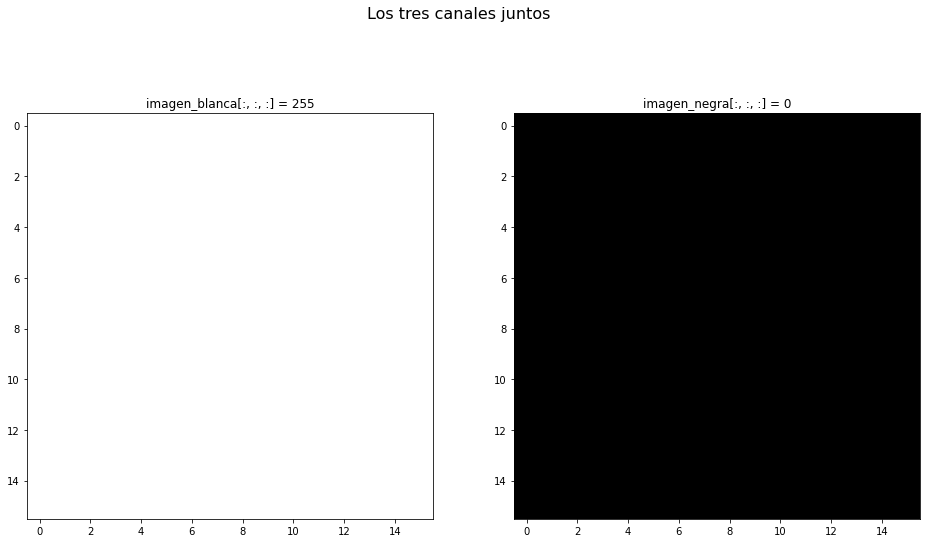

In [16]:
# ¿Qué sucede si colocamos los tres canales con su máximo o mínomo brillo?
# Obtenemos un blanco o un negro
fig = plt.figure(figsize=(16,9))
fig.suptitle('Los tres canales juntos', fontsize=16)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

imagen_blanca = np.ones(shape=(16, 16, 3), dtype=np.uint8) * 0
imagen_blanca[:, :, :] = 255
ax1.imshow(imagen_blanca)
ax1.set_title("imagen_blanca[:, :, :] = 255")

imagen_negra = np.ones(shape=(16, 16, 3), dtype=np.uint8) * 0
imagen_negra[:, :, :] = 0
ax2.imshow(imagen_negra)
ax2.set_title("imagen_negra[:, :, :] = 0")
plt.show()

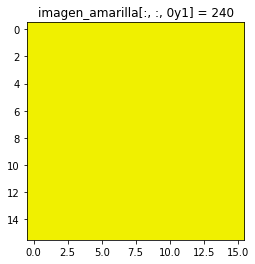

In [17]:
# Formar el color amarillo utilizando el canal rojo y verde
imagen_amarilla = np.ones(shape=(16, 16, 3), dtype=np.uint8) * 0
imagen_amarilla[:, :, 0] = 240
imagen_amarilla[:, :, 1] = 240
plt.imshow(imagen_amarilla)
plt.title("imagen_amarilla[:, :, 0y1] = 240")
plt.show()

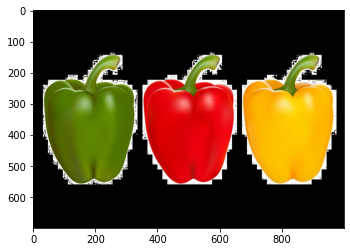

In [18]:
# La imagen de los morrones tiene fondo blanco, es decir que sus tres canales
# están en 255. Mediante un blucle podemos generar una magen sin el fondo
# Creamos una magen de igual tamaño a la de los morrones pero inicializada
# sus canales en 0 (negro, será el nuevo color de fondo)
imagen_sinfondo = np.ones(shape=img.shape, dtype=np.uint8) * 0

# Realizar un bucle que recorra la dimensión 700x1000
for h in range(img.shape[0]):
    for w in range(img.shape[1]):
        canal_red = img[h, w, 0]
        canal_green = img[h, w, 1]
        canal_blue = img[h, w, 2]
        if canal_red == 255 and canal_green == 255 and canal_blue == 255:
             # reemplazar fondo blanco por fondo negro
            imagen_sinfondo[h, w, :] = 0
        else:
            # sino es fondo, copiar de la imagen original
            imagen_sinfondo[h, w, :] = img[h, w, :] 

plt.imshow(imagen_sinfondo)
plt.show()

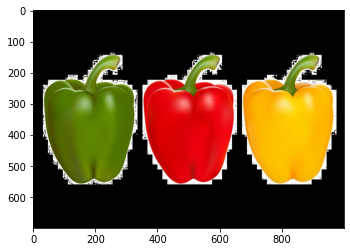

In [19]:
# Máscara para sacar el blacno (eliminar el fondo)
img_negra = img.copy()
mask_white = (img == [255,255,255]).all(-1)
img_negra[mask_white, :] = 0
plt.imshow(img_negra, vmin=0, vmax=255)
plt.show()

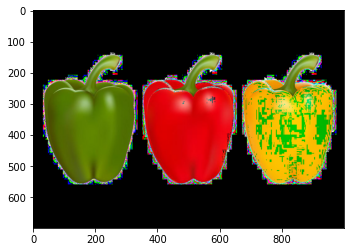

In [20]:
# Otra forma más sencilla es eliminar el color en cualquier
# caso de que alguno de los 3 canales esté en su máximo brillo
mask_white2 = img == (255,255,255)
img_negra2 = img.copy()
img_negra2[mask_white2] = 0
plt.imshow(img_negra2, vmin=0, vmax=255)

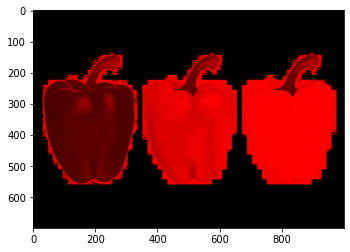

In [21]:
# Crear una imagen de los morrones de solo el canal rojo
# Como el blanco tiene los tres canales, sacaremos el negativo
imagen_copia2 = np.ones(shape=img.shape, dtype=np.uint8) * 0
imagen_copia2[:, :, 0] = img[:, :, 0]
# Sacar el blanco
imagen_copia2[mask_white, :] = 0
mask_white2
plt.imshow(imagen_copia2, vmin=0, vmax=255)
plt.show()

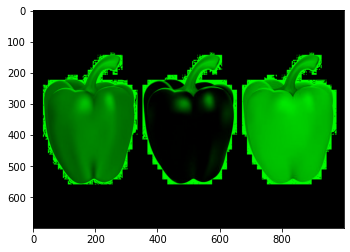

In [22]:
# Crear una imagen de los morrones de solo el canal verde
imagen_copia2 = np.ones(shape=img.shape, dtype=np.uint8) * 0
imagen_copia2[:, :, 1] = img[:, :, 1]
# Sacar el blanco
imagen_copia2[mask_white, :] = 0
plt.imshow(imagen_copia2, vmin=0, vmax=255)
plt.show()

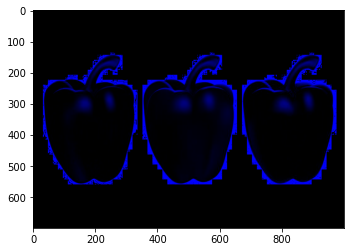

In [23]:
# Crear una imagen de los morrones de solo el canal azul
# Como el blanco tiene los tres canales, sacaremos el negativo
imagen_copia2 = np.ones(shape=img.shape, dtype=np.uint8) * 0
imagen_copia2[:, :, 2] = img[:, :, 2]
# Sacar el blanco
imagen_copia2[mask_white, :] = 0
plt.imshow(imagen_copia2, vmin=0, vmax=255)
plt.show()

## 4 - Imagenes en escala de grises (1 dimensión de profundidad)

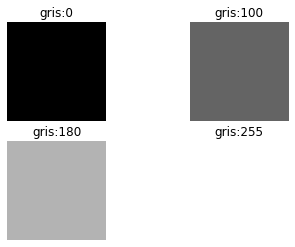

In [24]:
fig = plt.figure()
color = [0, 100, 180 ,255]
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    img2 = np.ones(shape=(16,16)) * color[i]
    ax.imshow(img2, cmap='gray', vmin=0, vmax=255)
    ax.set_title("gris:"+str(color[i]))
    ax.set_axis_off()

plt.show()

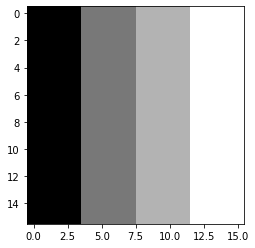

In [25]:
img3 = np.ones(shape=(16,16), dtype=np.uint8)
img3[:,:4] = 0
img3[:,4:8] = 120
img3[:,8:12] = 180
img3[:,12:16] = 255
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.show()

## 5 - Imagen a RGB (color) a escala de grises

In [26]:
# Fórmula para transformar una imagen a color (3 canales)
# a escala de grises (1 canal)
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

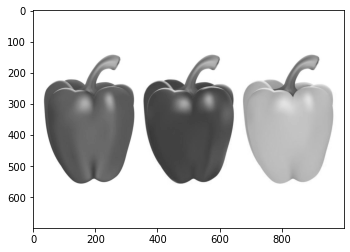

In [27]:
gray = rgb2gray(img)    
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.show()

In [28]:
print("Dimensiones: alto:", gray.shape[0], ", ancho:", gray.shape[1], ", canales:", 1) 
print("Dimensiones: height:", gray.shape[0], ", width:", gray.shape[1], ", channles:", 1)
print(gray.shape)

Dimensiones: alto: 700 , ancho: 1000 , canales: 1
Dimensiones: height: 700 , width: 1000 , channles: 1
(700, 1000)
